(4096, 4096)


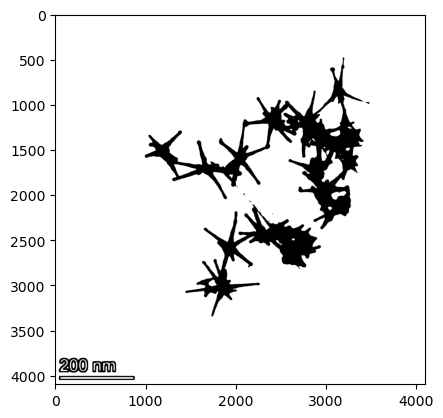

In [3]:
import skimage as ski
import numpy as np
from skimage.util import invert
from skimage.color import rgb2gray
%matplotlib inline
import matplotlib.pyplot as plt
import os
from skimage.morphology import skeletonize, thin

filename = 'hard.png'
image = ski.io.imread(filename)
image = rgb2gray(image)
for i in range(50):
    image = ski.filters.gaussian(image)
""" further enhancement an be made with opening and closing the image
background can be worked out suing selective backgrounds (source youtube Nicolai)"""
copied = image.copy()
print(np.shape(copied))
for r in range(4096):
    for i in range(4096):
        a = round(image[r][i],2)
        if a > 0.6:
            copied[r][i]= 1
        else:
            copied[r][i] = 0
plt.imshow(copied, cmap = 'gray')

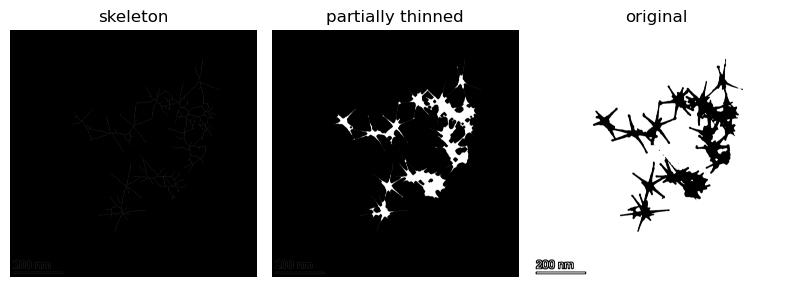

In [4]:
from skimage.morphology import skeletonize, thin

image = invert(copied)
skeleton = skeletonize(image)
''' can be enhanced by opening and closing to get rid of small curves
  the centres can be found by open function only on the core (core is colored differently)'''
thinned_partial = thin(image, max_num_iter=20)

fig, axes = plt.subplots(1,3, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(skeleton, cmap=plt.cm.gray)
ax[0].set_title('skeleton')
ax[0].axis('off')

ax[1].imshow(thinned_partial, cmap=plt.cm.gray)
ax[1].set_title('partially thinned')
ax[1].axis('off')

ax[2].imshow(invert(image), cmap=plt.cm.gray)
ax[2].set_title('original')
ax[2].axis('off')


fig.tight_layout()
plt.show()

In [6]:
image = skeleton
scaled_image = (image ^ np.min(image)) / (np.max(image) ^ np.min(image)) * 255
image_uint8 = scaled_image.astype(np.uint8)
ski.io.imsave('outputh.png', image_uint8)

C:\Users\user\AppData\Local\Temp\ipykernel_9564\2396380715.py:4: UserWarning: outputh.png is a low contrast image
  ski.io.imsave('outputh.png', image_uint8)
